In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a consistent style for our plots
sns.set_style('darkgrid')

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("padmapriyatr/netflix-titles")

print("Path to dataset files:", path)

100%|██████████| 1.34M/1.34M [00:00<00:00, 85.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/padmapriyatr/netflix-titles/versions/1


In [8]:
df.shape

(8807, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
mode_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(mode_country)

In [12]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [13]:
df.dropna(subset=['date_added', 'rating'], inplace=True)

In [14]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=False)

In [15]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [16]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [18]:
# Verify our cleaning and transformation
print("Missing values after cleaning:")
print(df.isnull().sum())
print("\nData types after transformation:")
print(df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


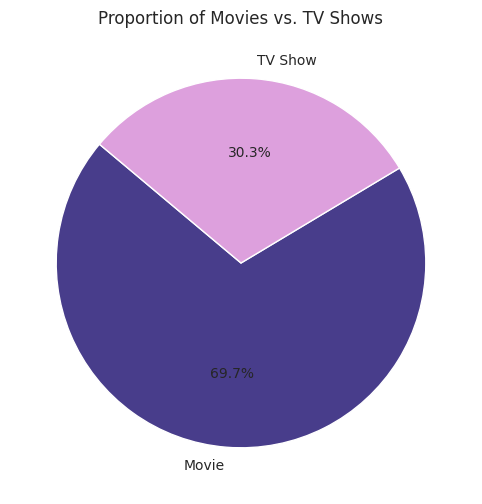

In [19]:
plt.figure(figsize=(8, 6))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#483d8b', '#dda0dd'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

<Figure size 1400x800 with 0 Axes>

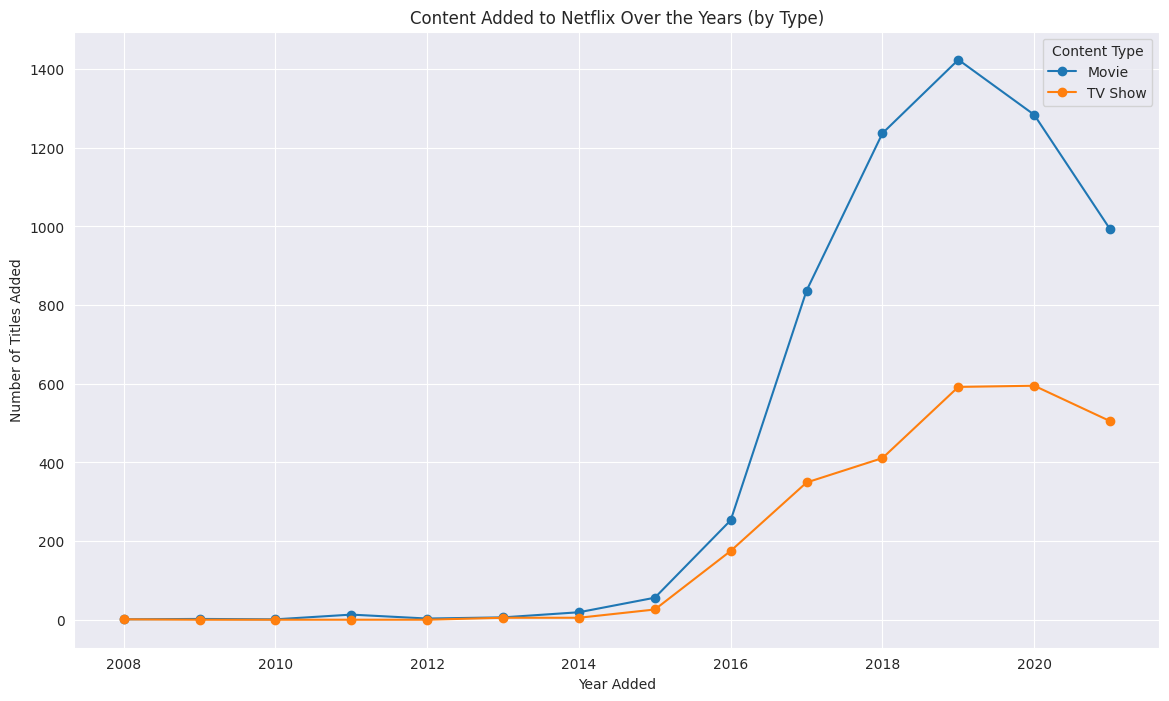

In [20]:
# Group data by year and content type
content_over_time = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

In [21]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9


In [22]:
# Split the 'listed_in' column and explode it
# here, we are creating a new dataframe 'genres' where each genre from the 'listed_in' column is split into separate rows
genres = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')
genres.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,International TV Shows
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,TV Dramas
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Crime TV Shows


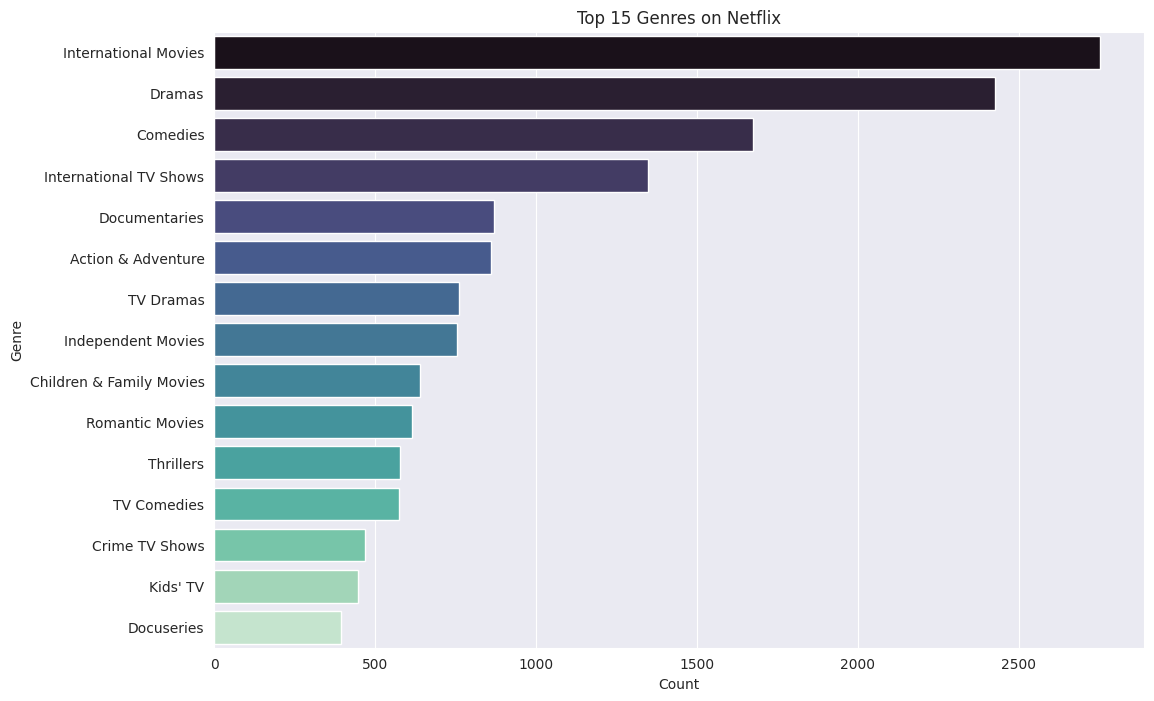

In [23]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [24]:
# Separate movies and TV shows
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [26]:
# Clean and convert duration for movies
movies_df['duration'] = movies_df['duration'].fillna('0 min')
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['duration'] = tv_shows_df['duration'].fillna('0 Season')
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

In [28]:
# Handle the multi-country listings similar to genres
countries = df.assign(country=df['country'].str.split(', ')).explode('country')

In [29]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

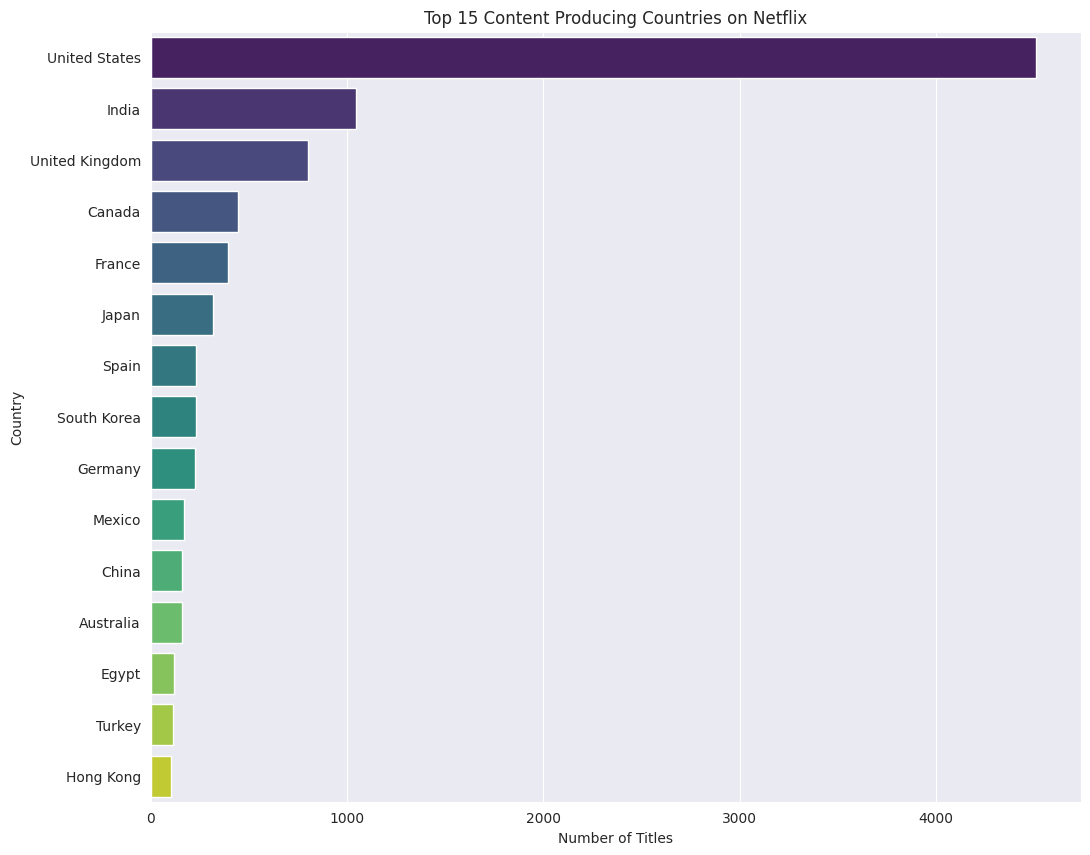

In [30]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

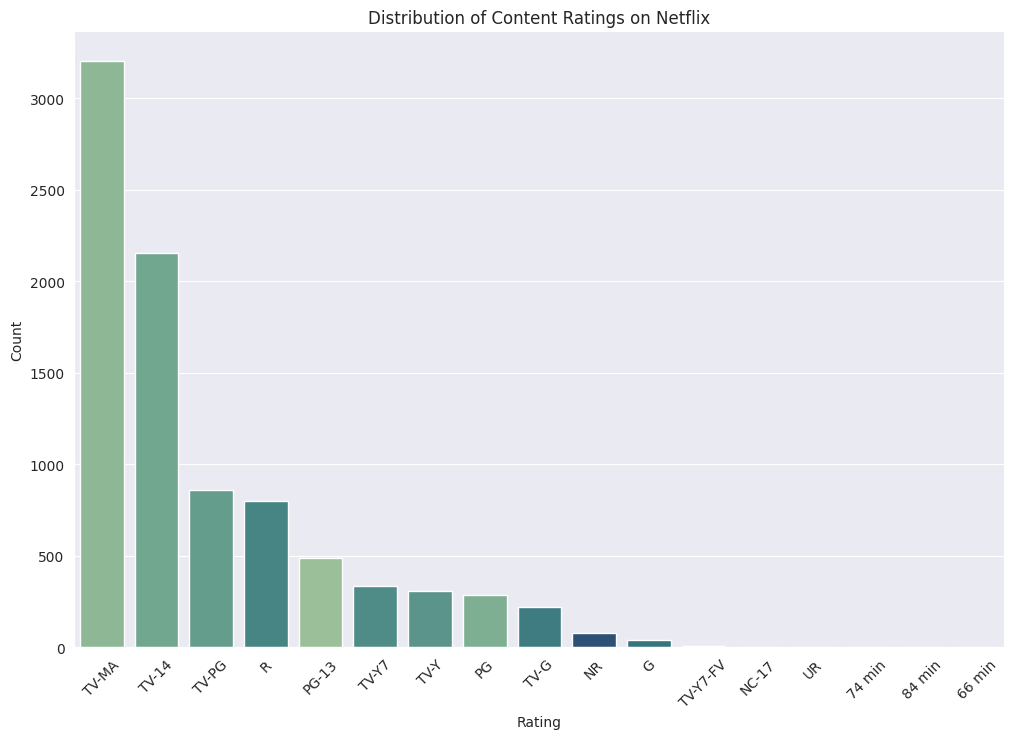

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

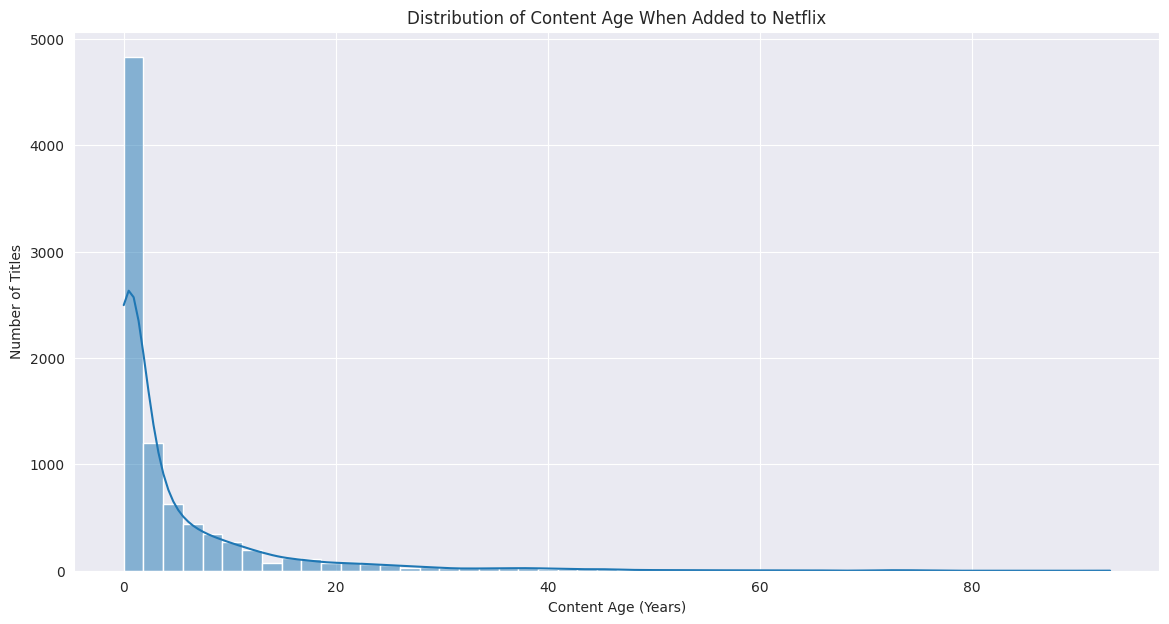

In [32]:
# Create the 'age_on_netflix' feature
df['age_on_netflix'] = df['year_added'] - df['release_year']
content_age = df[df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

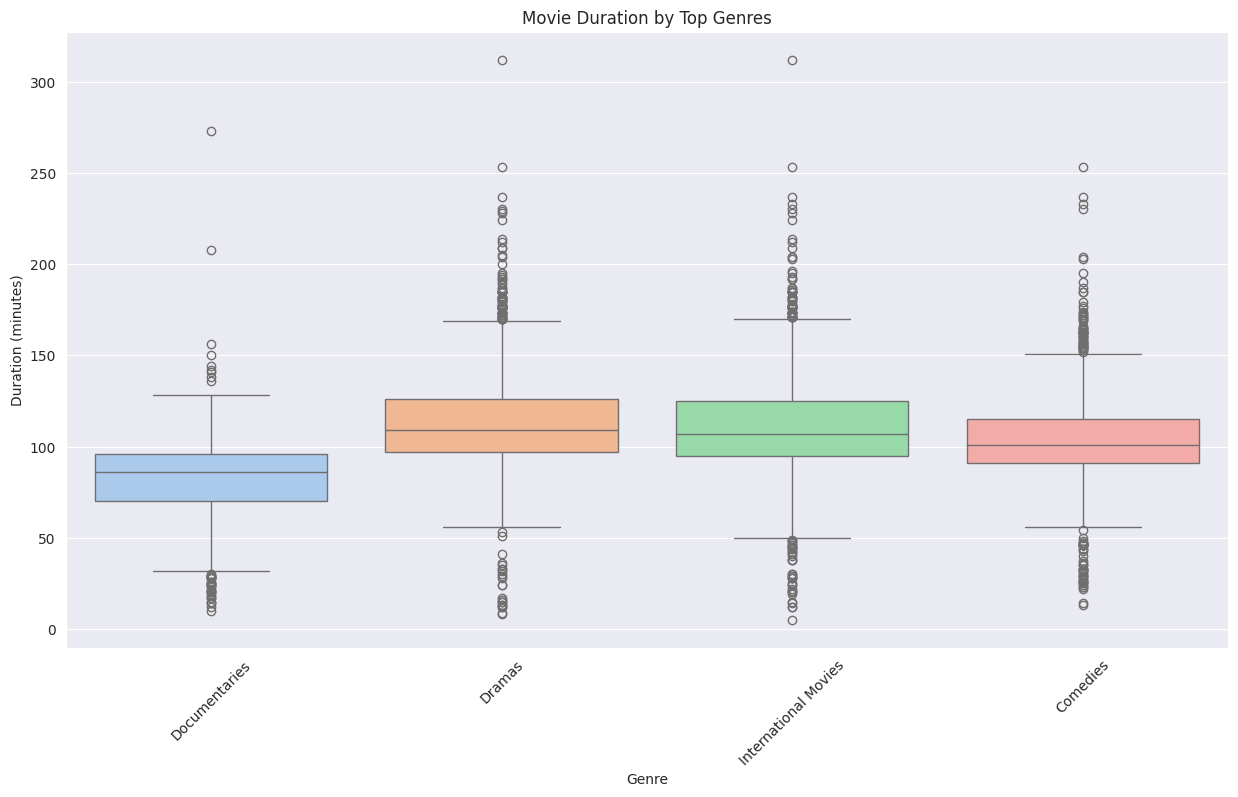

In [33]:
# movie duration vs top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

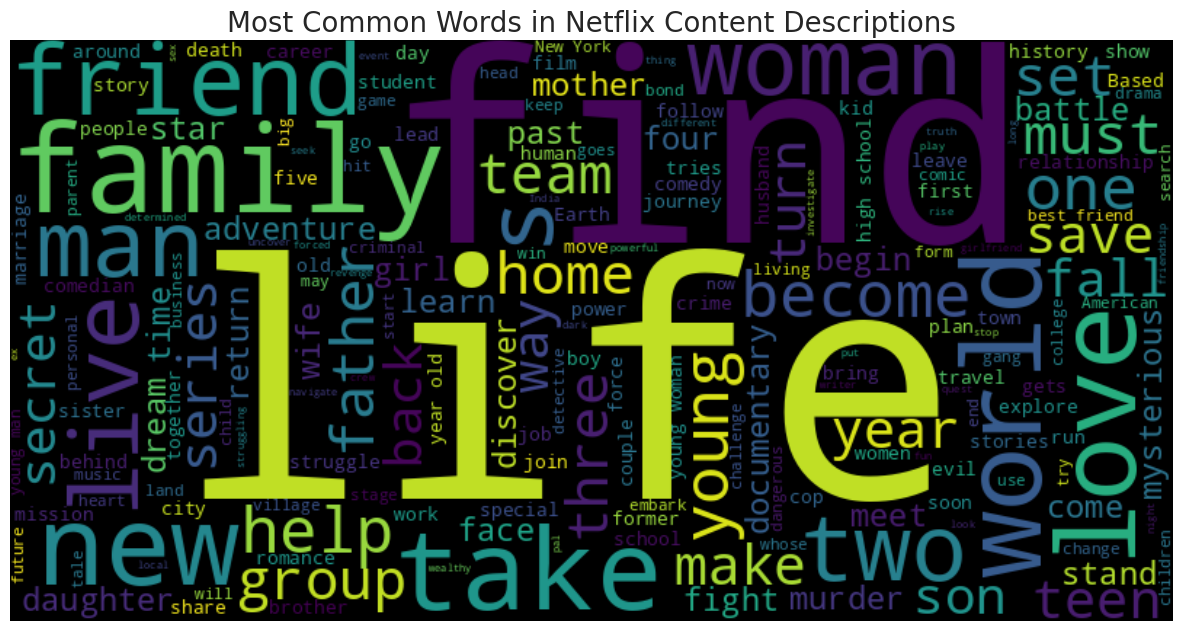

In [34]:
# Combine all descriptions into a single string
text = ' '.join(df['description'])
# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

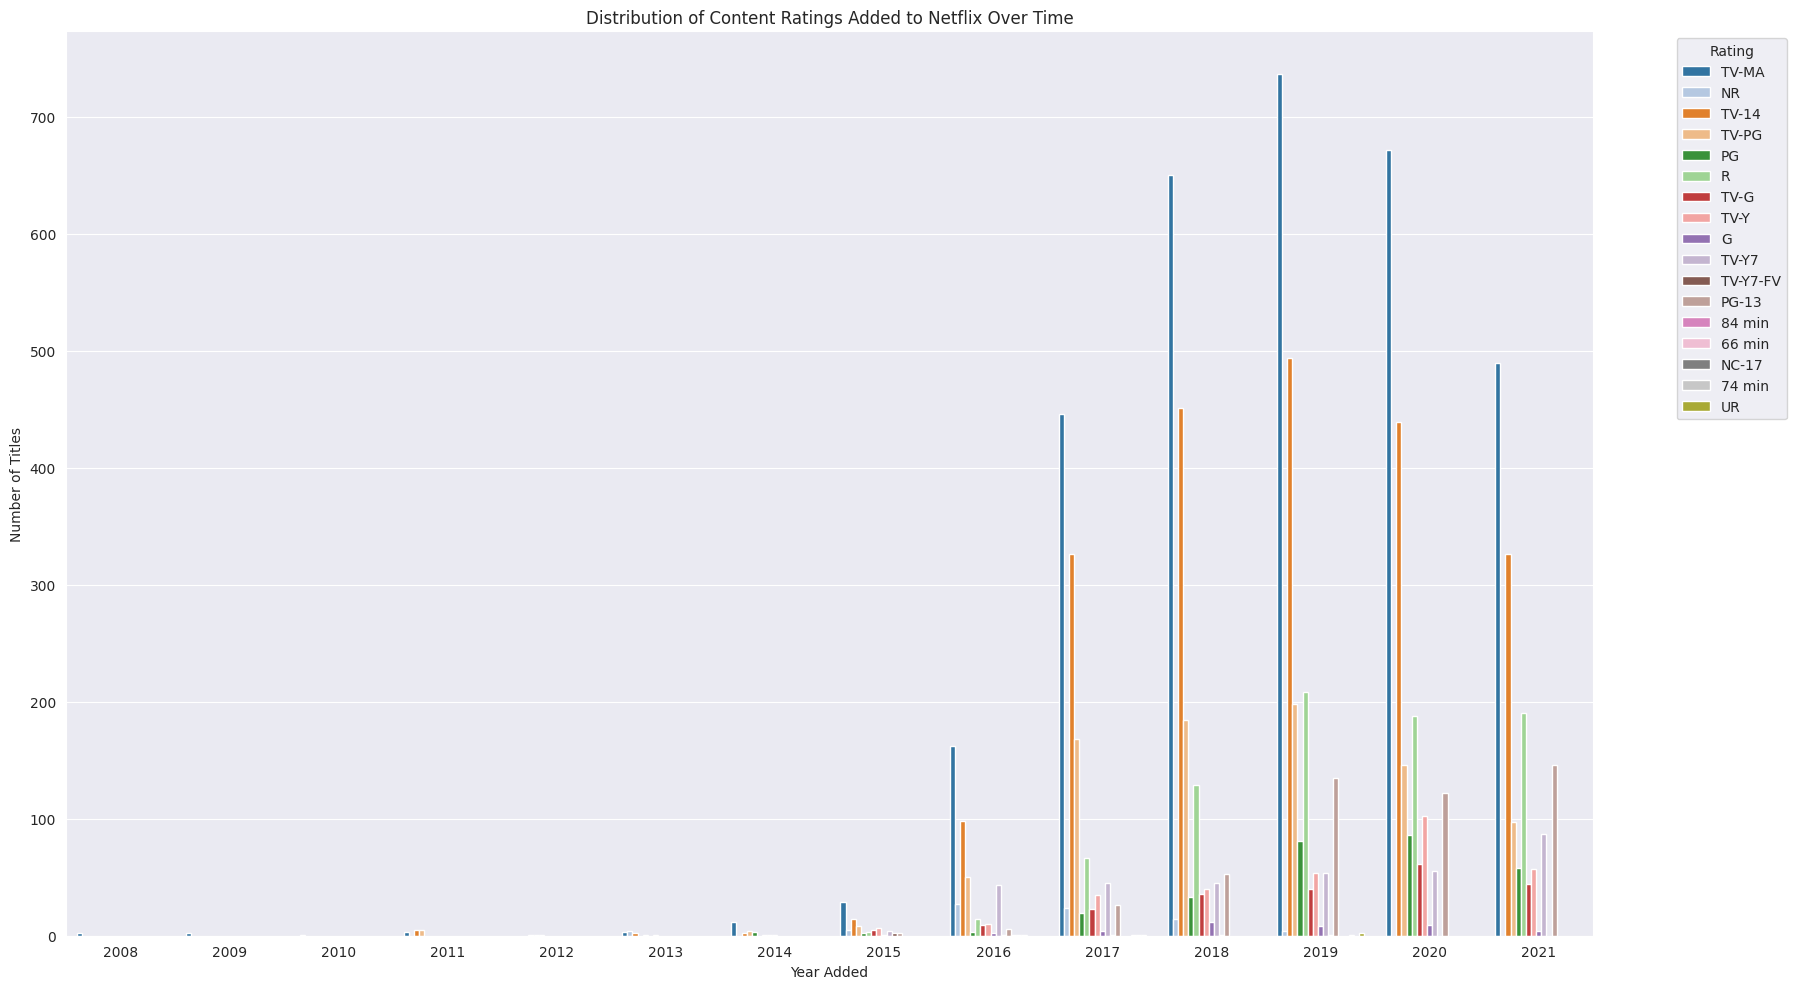

In [35]:
plt.figure(figsize=(18, 10))
sns.countplot(data=df, x='year_added', hue='rating', order=sorted(df['year_added'].dropna().unique()), palette='tab20')
plt.title('Distribution of Content Ratings Added to Netflix Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

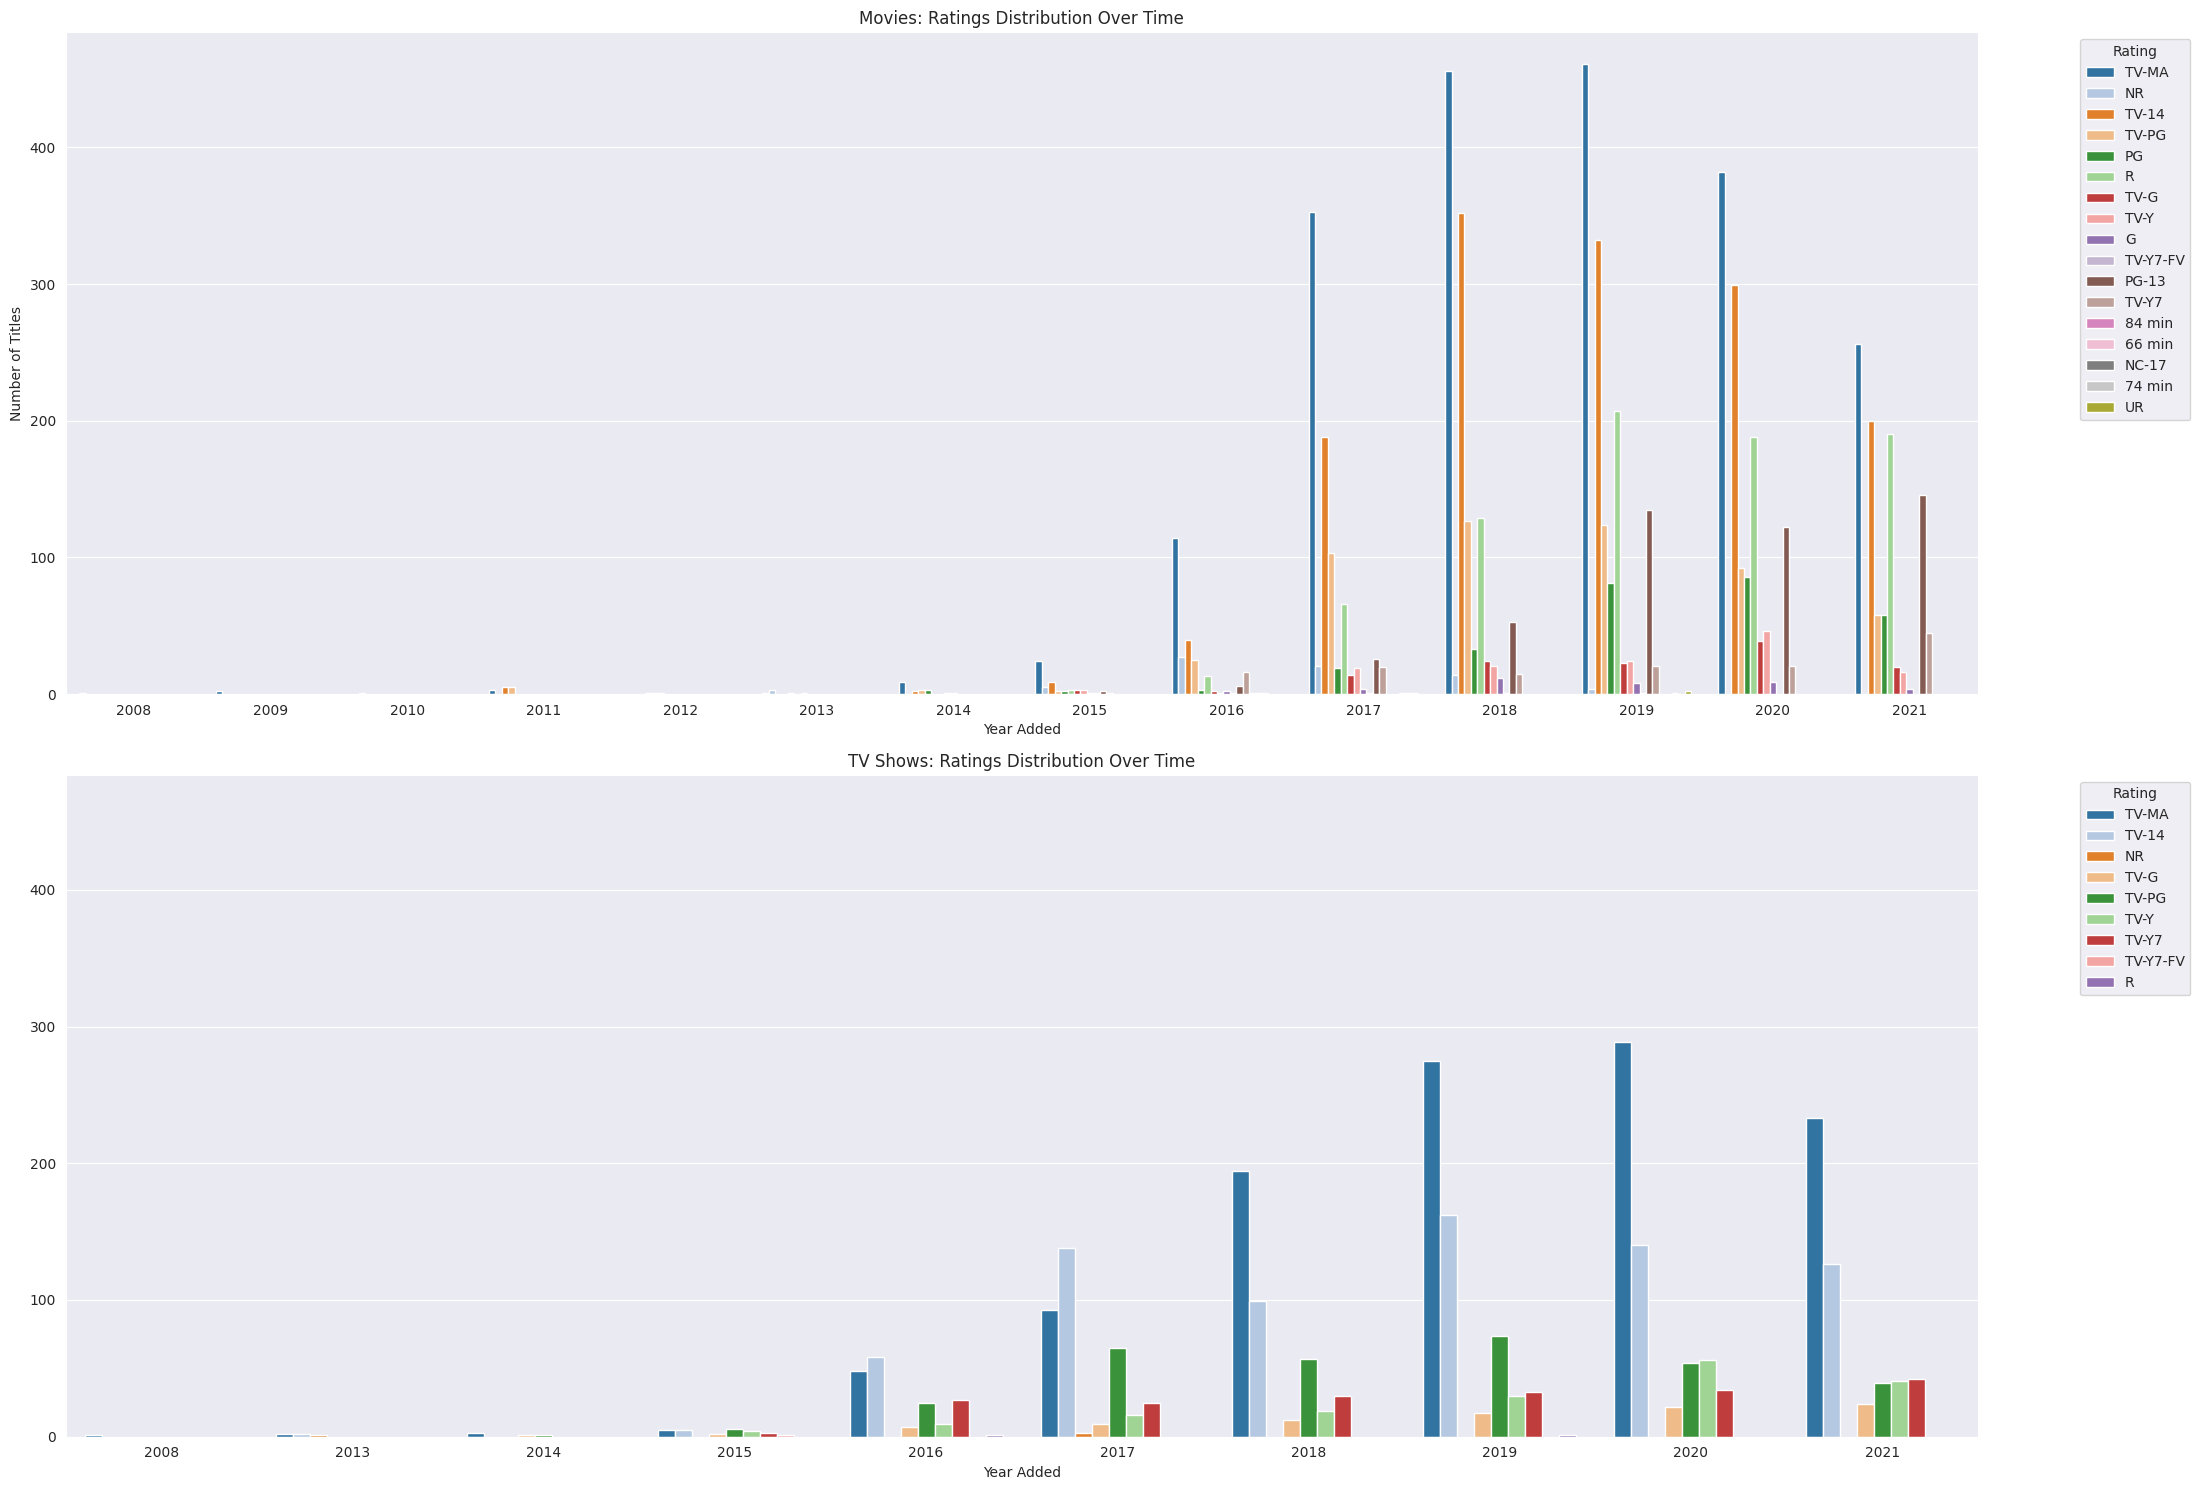

In [36]:
# Let's use the movies and TV shows dfs again --> this will give us 2 separate plots for better insights

fig, axes = plt.subplots(2, 1, figsize=(22, 15), sharey=True)

# Movies subplot
sns.countplot(
    data=movies_df,
    x='year_added',
    hue='rating',
    order=sorted(movies_df['year_added'].dropna().unique()),
    palette='tab20',
    ax=axes[0]
)
axes[0].set_title('Movies: Ratings Distribution Over Time')
axes[0].set_xlabel('Year Added')
axes[0].set_ylabel('Number of Titles')
axes[0].legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# TV Shows subplot
sns.countplot(
    data=tv_shows_df,
    x='year_added',
    hue='rating',
    order=sorted(tv_shows_df['year_added'].dropna().unique()),
    palette='tab20',
    ax=axes[1]
)
axes[1].set_title('TV Shows: Ratings Distribution Over Time')
axes[1].set_xlabel('Year Added')
axes[1].set_ylabel('')

axes[1].legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [37]:
# Display TV series with rating 'R' (if any)
tv_shows_r = tv_shows_df[tv_shows_df['rating'] == 'R']
tv_shows_r

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,seasons
3893,s3894,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",United States,2019-04-25,2015,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019,4,1
7593,s7594,TV Show,Nobel,Unknown,"Aksel Hennie, Tuva Novotny, Anders Danielsen L...",Norway,2016-12-10,2016,R,1 Season,"International TV Shows, TV Dramas, TV Thrillers",A series of incidents in Afghanistan set compl...,2016,12,1


In [38]:
content_age.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,1
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,0


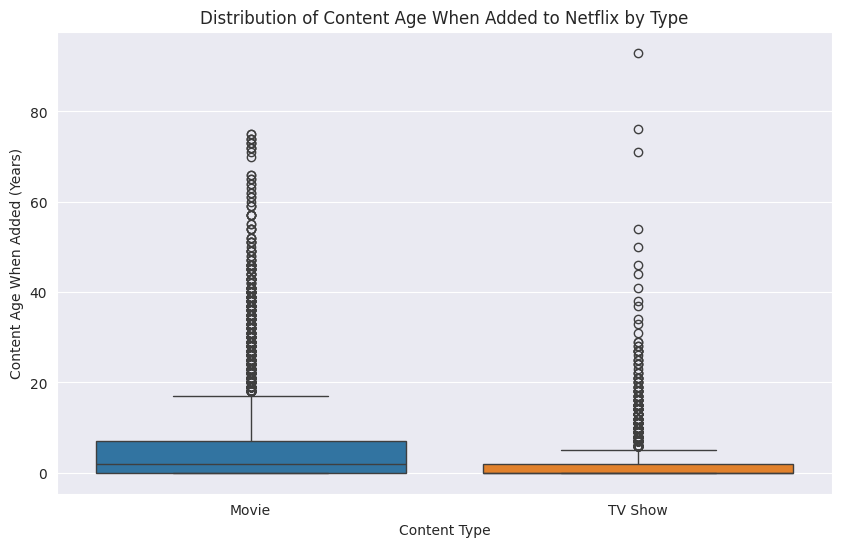

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=content_age, x='type', y='age_on_netflix', hue='type')
plt.title('Distribution of Content Age When Added to Netflix by Type')
plt.xlabel('Content Type')
plt.ylabel('Content Age When Added (Years)')
plt.show()

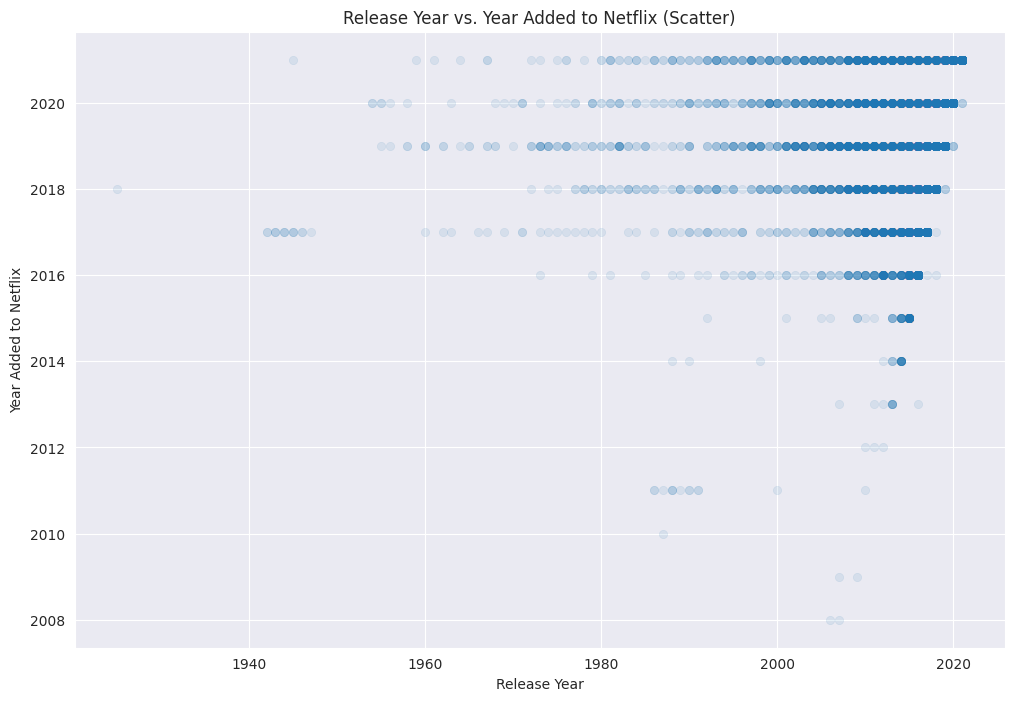

In [40]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, x='release_year', y='year_added',
    alpha=0.1, edgecolor=None
)
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.title('Release Year vs. Year Added to Netflix (Scatter)')
plt.show()

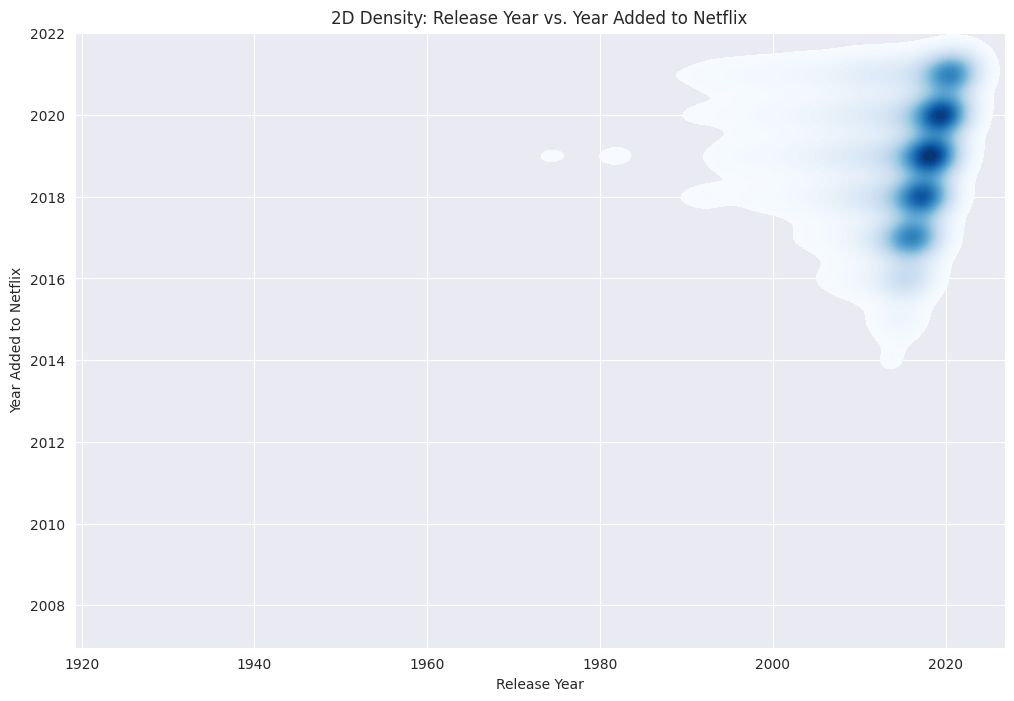

In [41]:
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=df, x='release_year', y='year_added',
    fill=True, cmap='Blues', thresh=0.05, levels=100
)
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.title('2D Density: Release Year vs. Year Added to Netflix')
plt.show()

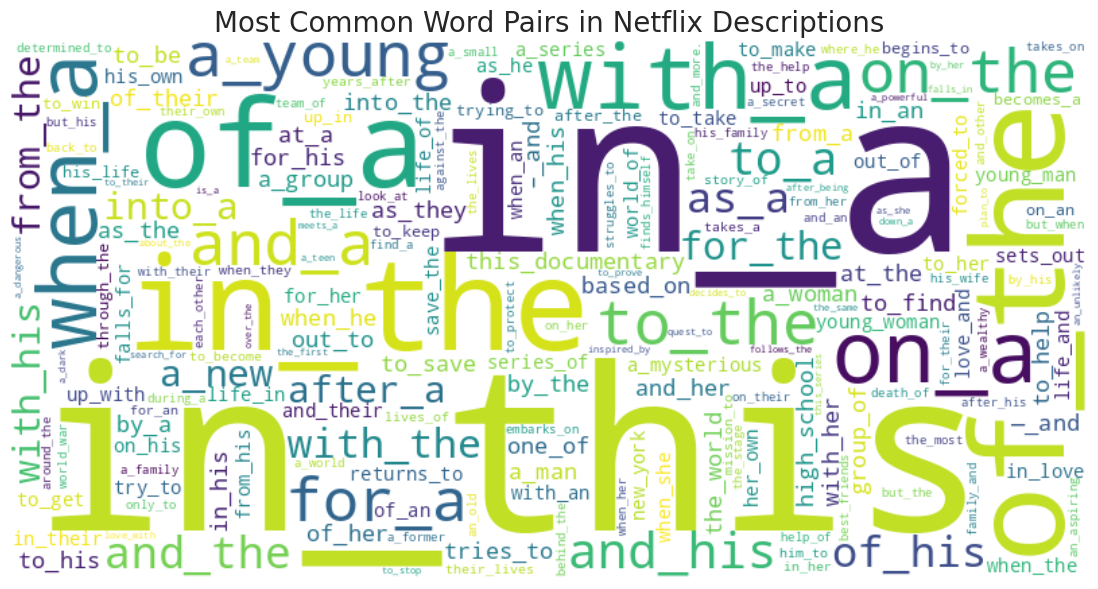

In [42]:
from wordcloud import WordCloud
from collections import Counter

# Prepare bigrams from all descriptions
all_words = ' '.join(df['description'].dropna()).lower().split()
bigrams = ['_'.join([all_words[i], all_words[i+1]]) for i in range(len(all_words)-1)]

# Count bigram frequencies
bigram_counts = Counter(bigrams)

# Generate a word cloud for bigrams
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_counts)

plt.figure(figsize=(15, 7))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Word Pairs in Netflix Descriptions', fontsize=20)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


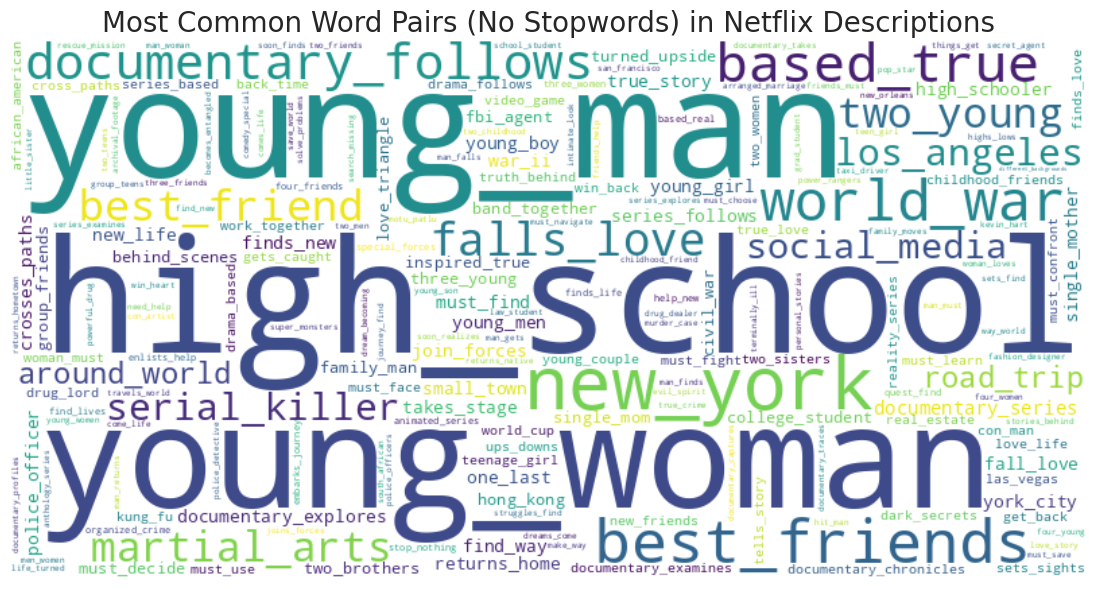

In [43]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and clean
all_words = ' '.join(df['description'].dropna()).lower().split()
filtered_words = [w for w in all_words if w.isalpha() and w not in stop_words]

# Create bigrams from filtered words
bigrams = ['_'.join([filtered_words[i], filtered_words[i+1]]) for i in range(len(filtered_words)-1)]

# Count bigram frequencies
bigram_counts = Counter(bigrams)

# Generate a word cloud for bigrams
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_counts)

plt.figure(figsize=(15, 7))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Word Pairs (No Stopwords) in Netflix Descriptions', fontsize=20)
plt.show()

In [44]:
# Top 10 directors with the most titles on Netflix (excluding 'Unknown')
top_directors = (
    df[df['director'] != 'Unknown']['director']
    .value_counts()
    .head(50)
    .reset_index()
)
top_directors.columns = ['Director', 'Number of Titles']
top_directors

,Director,Number of Titles
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Martin Scorsese,12
7,Jay Chapman,12
8,Youssef Chahine,12
9,Steven Spielberg,11


/tmp/ipython-input-472112247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Director', x='Number of Titles', data=top_directors.head(20), palette='flare')


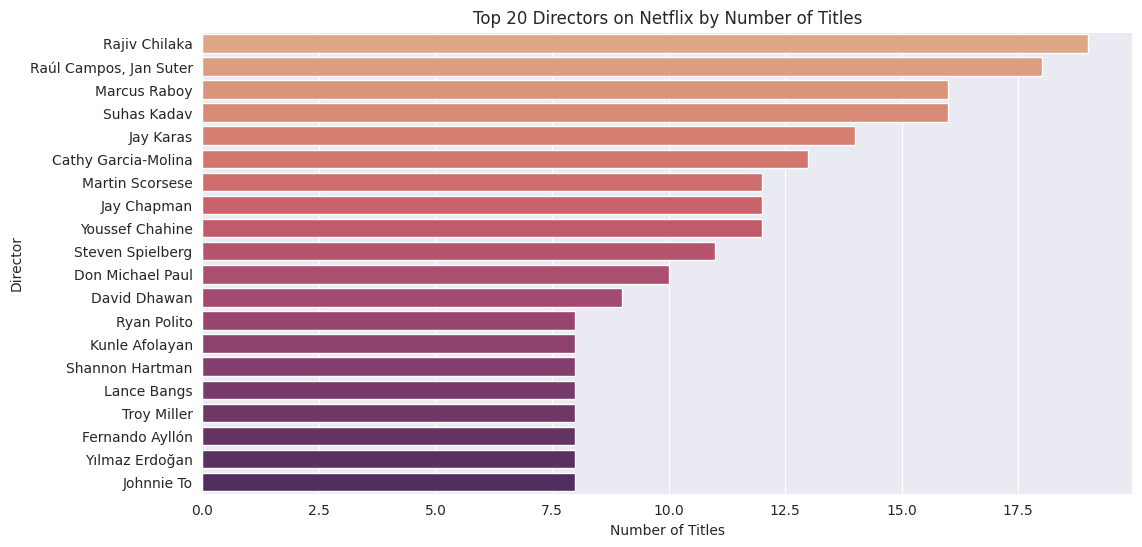

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(y='Director', x='Number of Titles', data=top_directors.head(20), palette='flare')
plt.title('Top 20 Directors on Netflix by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()